
# Breve introducción a métodos de análisis de datos 
<br>
<br>

***

##### M. en C. David Omar Flores Tavira
<br>
<br>

***

En este documento se introducen las herramientas (wavelet y análisis de Fourier) propuestas para llevar acabo el análisis de resultados experimentales en espectroscopía Raman, sin embargo muchas de las herramientas poseen un nivel de generalidad que permite extrapolar sus aplicaciones a otras áreas facilmente como se puede verificar en algunos proyectos recientes.
<br>
<br>

***

El término que utilizaremos para designar a las mediciones será *observación*, una observación esta representada por un vector $n-\textrm{dimensional}$
<br>
<br>

$$
\hat{x} = 
\begin{bmatrix}
 x_1 \\
 x_2 \\
 \vdots \\
 x_n
\end{bmatrix}
$$

***


Estos vectores de observación, pueden estar restringidos en algunas direcciones y pueden dispersarse en otras una cierta cantidad llamada varianza, el objetivo principal es describir el sistema con la menor cantidad de datos posible, optimizando la representación del sistema. El teoréma de la descomposición de valores singulares (Singular Value Decomposition) establece que si tenemos una matríz de observaciones $X$ esta puede representarse de manera aproximada por el producto de las matrices que contienen eigenvalores y eigenvectores del sistema.

<br>
<br>

$$
X = 
\begin{bmatrix}
x_{11} & x_{12} & ... & x_{1n} \\
x_{21} & x_{12} & ... & x_{1n} \\
\vdots & \vdots & ... & \vdots \\
x_{m1} & x_{m2} & ... & x_{mn} \\
\end{bmatrix}
= 
\begin{bmatrix}
| & | &  & | \\
\hat{x_1} & \hat{x_2} & \vdots & \hat{x_m} \\
| & | &  & | \\
\end{bmatrix}
$$

<br>
<br>
$$
X = U \Sigma V
$$

***

En la práctica, la resolución de ecuaciones que modelen sistemas dinámicos complejos puede requerir de la solución de ecuaciones diferenciales parciales, sin embargo la transformada de Fourier aplicada a dichos sistemas de ecuaciones transforma las ecuaciones diferenciales parciales en ecuaciones diferenciales ordinarias. La transformada de Fourier es un cambio de espacio en el que la función se representa en términos de funciones oscilatorias, es decir, la funcion se representa por ciertos coeficientes asociados al elemento de la base.

$$
f(x) = \sum_{k = -\infty}^{\infty} C_k e^{\frac{ik\pi x}{L}}
$$


$$
w_k = \frac{k \pi}{L} = k \Delta w \: \: ; \Delta w = \frac{\pi}{L}
$$


$$
C_k = \frac{1}{2 L} \: \langle{f(x), \Psi_{k}} \rangle = 
\frac{1}{2 L} \int_{-L}^{L} f(x) e^{-\frac{ik \pi x}{L}} dx 
$$

$$
f(x) = \lim_{\Delta w\to 0} \sum_{k= -\infty}^{\infty} \frac{\Delta w}{2\pi} 
\left( \int_{-\infty}^{\infty} f(u) e^{-ik\Delta w u} du \right) e^{ik\Delta w x} 
$$

$$
f(x) = \frac{1}{2 \pi} \int_{-\infty}^{\infty} 
\left( \int_{-\infty}^{\infty} f(u) e^{-i w u} du \right) e^{iwx} dw
$$

$$
\mathcal{F(x)} = \int_{-\infty}^{\infty} f(x) e^{-iwx} dx 
$$

$$
f(x) = \frac{1}{2 \pi} \int_{-\infty}^{\infty} \mathcal{F(x)} e^{iwx} dw
$$

***
Algunas propiedades de gran utilidad son las siguientes: 

* Reducción EDP a EDO
<br>
<br>
$$
\mathcal{F} \left( \frac{d}{dx} f(x) \right) = iw \mathcal{F} \left( f(x) \right)
$$
<br>
<br>
Por lo que si tenemos una ecuación de segundas derivadas tal que...
<br>
<br>
$$
U_{tt} = C \: U_{xx}
$$
<br>
<br>
Aplicando F
<br>
<br>
$$
\hat{U_{tt}} = -\omega² \hat{U}
$$
<br>
<br>
* Se utiliza en el cálculo de integrales de convolución
<br>
<br>
$$
\mathcal{F} \left( \int_{-\infty}^{\infty} f(x - \xi) g(\xi) d\xi \right) = 
\mathcal{F(f)} \mathcal{F(g)}
$$

In [2]:
from PIL import Image, ImageOps

def showImage(image, resize = False):
    im1 = Image.open(image)
    if resize:
        im1 = im1.resize((1440,720),Image.ANTIALIAS)
    im1in = ImageOps.invert(im1)
    return display(im1in);

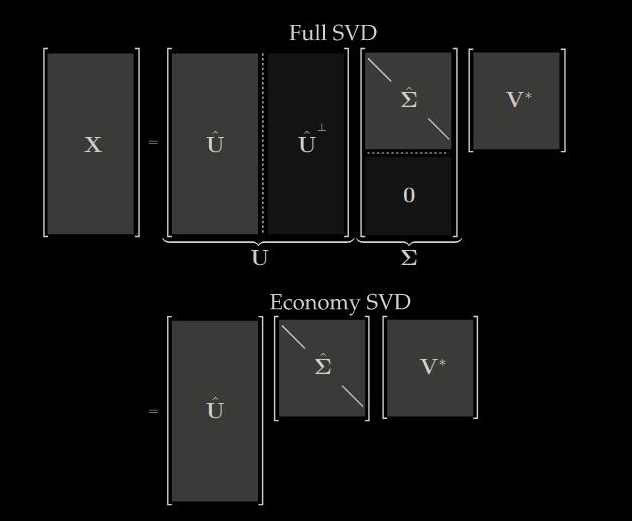

In [11]:
showImage('im1.jpg')

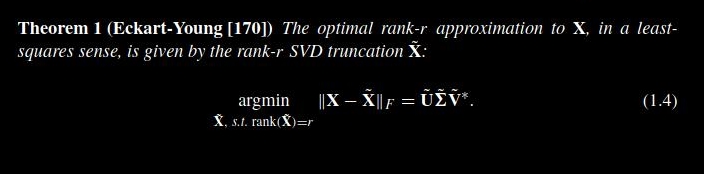

In [12]:
showImage('im2.jpg')

In [3]:
def cuadrado(x):
    return x*x;

cuadrado(9)

81

In [4]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
import scaleogram as scg
from skimage import io

class RamanSpectra(object):

    def __init__(self, pathFile, upLevels = 0):
        self.pathFile = pathFile
        self.name = pathFile.split('/')[-1]
        self.readFromLocation(pathFile, upLevels)
        # After this execution the object has the following properties
        # self ... content, info, spx, spy
        return;
    
    def __str__(self):
        return 'raman_s at +++ ' + self.docLoc;

    def __repr__(self):
        return 'raman_s at ... ' + self.docLoc;
    
    def scaleogram(self, ran=(0,1000), scaleLim = 1001):
        time   = np.array(self.spx[ran[0]:ran[1]])
        data   =  np.array(self.spy[ran[0]:ran[1]])  # insert a gaussian at the center
        scales = np.arange(1,scaleLim) # scaleogram with 100 rows
        cwt    =  scg.CWT(time, data, scales) # compute ONCE the Continuous Wavelet Transform
        return scg.cws(cwt)
    
    def scaleogram2(self,  ran=(0,1000), scaleLim = 1001):
        time   = np.array(self.spx[ran[0]:ran[1]])
        data   =  np.array(self.spy[ran[0]:ran[1]])  # insert a gaussian at the center
        scales = np.arange(1,scaleLim) # scaleogram with 100 rows
        cwt    =  np.abs(scg.CWT(time, data, scales).coefs) # compute ONCE the Continuous Wavelet Transform
        fig, ax = plt.subplots()
        fig.set_size_inches(16,8)
        ax.imshow(cwt, cmap='viridis')
        ax.set_title(self.name)
        plt.savefig(self.name+'.jpeg',dpi=900)
        plt.subplots_adjust()




    def readFromLocation(self, pathFile, upLevels):
        count = 0
        initialPath = os.getcwd().split('/')[1:]
        # TODO: Raise error when upLevels > treeDepth
        while count  < upLevels:
            initialPath.pop()
            count +=1
        docLoc = '/'+ '/'.join(initialPath)+'/'+pathFile
        self.docLoc = docLoc

        with open(docLoc, 'r', encoding = 'unicode_escape') as tempfile:
                self.content = tempfile.read()
                self.dets    = self.content.split('#Acquired')[0]
                self.info    = self.content.split('#Acquired')[1].split('\n')[0].replace("=\t",'')
                _values  = self.content.split('#Acquired')[1].split('\n')[1:-1]
                self.spx=[]
                self.spy=[]
                for values in _values:
                    try:
                        x = float(values.split('\t')[0])
                        y = float(values.split('\t')[1])
                    except:
                        print('Ocurrio un error al hacer la lectura de los archivos')
                    self.spx.append(x)
                    self.spy.append(y)
        return;
    
    
    def plot(self, darkMode=True):
        if darkMode:
            with plt.rc_context({'xtick.color':'white', 'ytick.color':'white', 'axes.facecolor':'1D0B3A'}):
                fig, ax = plt.subplots()
                ax.plot(self.spx, self.spy)
                ax.set_title(self.info)
        else:
            fig, ax = plt.subplots()
            ax.plot(self.spx, self.spy)
            ax.set_title(self.info)
    
    def altPlot(self,xinit = 0, labelGap = -1200, yinit = 0, xlim = 6001, ylim = 4001, plotSize = (16,8), xMstep=500,xmstep=100,yMstep=500,ymstep=100):
        with plt.rc_context({'xtick.color':'black', 'ytick.color':'black'}):
            fig, ax = plt.subplots()
            fig.set_size_inches(plotSize[0],plotSize[1])

            ss = self.dets.replace(' ','').replace('\t','').split('\n')

            p1, q1, text1 = labelGap, 2800, ss[0]
            p2, q2, text2 = labelGap, 2400, ss[1]
            p3, q3, text3 = labelGap, 2000, ss[2]
            p4, q4, text4 = labelGap, 1600, ss[16]
            p5, q5, text5 = labelGap, 1200, ss[17]
            p6, q6, text6 = labelGap, 800,  ss[18]
            p7, q7, text7 = labelGap, 400,  ss[19]
            p8, q8, text8 = labelGap, 0, self.info
            
            ax.text(p1, q1, text1)
            ax.text(p2, q2, text2)
            ax.text(p3, q3, text3)
            ax.text(p4, q4, text4)
            ax.text(p5, q5, text5)
            ax.text(p6, q6, text6)
            ax.text(p7, q7, text7)
            ax.text(p8, q8, text8)

            #More Parameters
            # color = 'black'
            ax.plot(self.spx, self.spy, color= 'black',linewidth = 0.6)
            plt.fill_between(self.spx,self.spy, color='b', alpha=0.05)
            plt.ylim([yinit, ylim])
            plt.xlim([xinit, xlim])
            plt.xlabel(r'$Raman \: Shift (cm^{-1})$', fontsize=20)
            plt.ylabel(r'$Intensity \: (A.U.)$', fontsize=20)

            ax.set_title(self.name)
            
            major_ticks = np.arange(xinit, xlim, xMstep)
            minor_ticks = np.arange(xinit, xlim, xmstep)

            ymajor_ticks = np.arange(yinit, ylim, yMstep)
            yminor_ticks = np.arange(yinit, ylim, ymstep)

            ax.set_yticks(ymajor_ticks)
            ax.set_yticks(yminor_ticks, minor=True)

            ax.set_xticks(major_ticks)
            ax.set_xticks(minor_ticks, minor=True)
            
            # Or if you want different settings for the grids:
            ax.grid(which='minor', alpha=0.4)
            ax.grid(which='major', alpha=0.8)
            plt.savefig('test.jpeg',dpi=900)
            plt.subplots_adjust()

In [5]:
p = RamanSpectra('/PR6S1E_01.txt')

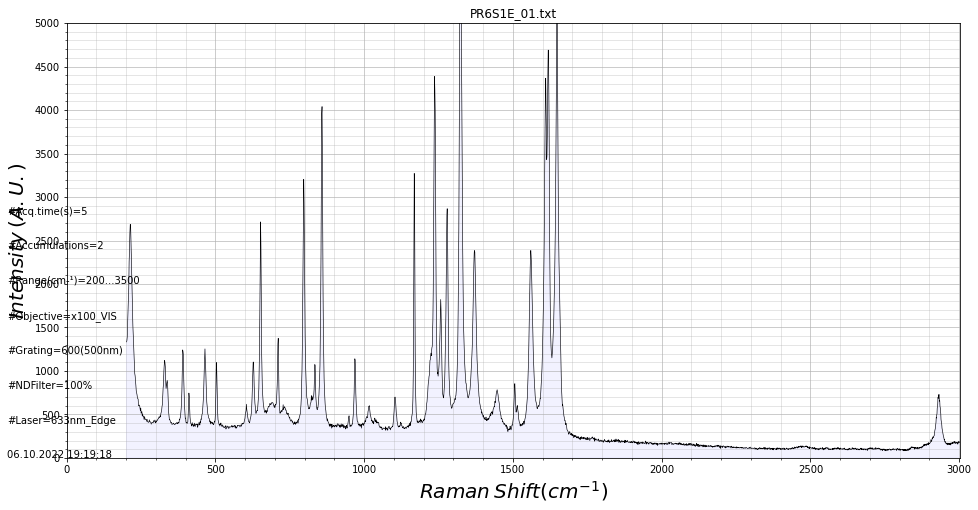

In [6]:
p.altPlot(xinit=0, labelGap = -200 ,xlim=3001,ylim=5001)

In [11]:
print(len(p.spy),len(p.spx))

3340 3340


<AxesSubplot:title={'center':'Continuous Wavelet Transform Amplitude Spectrum'}, xlabel='Time/spatial domain', ylabel='Period'>

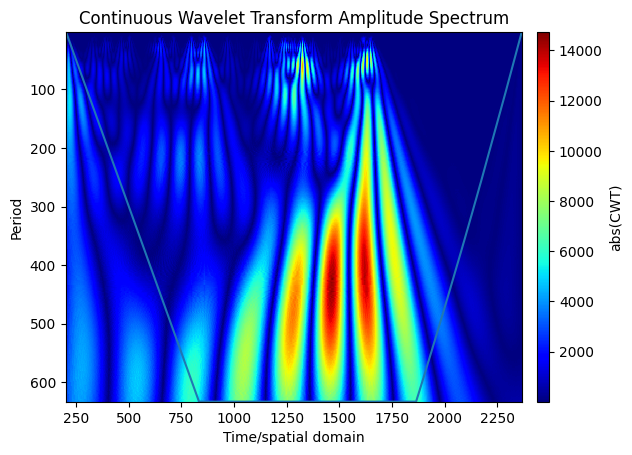

In [19]:
p.scaleogram(ran= (0,2000),scaleLim=300)

In [ ]:
p.scaleogram(ran=())

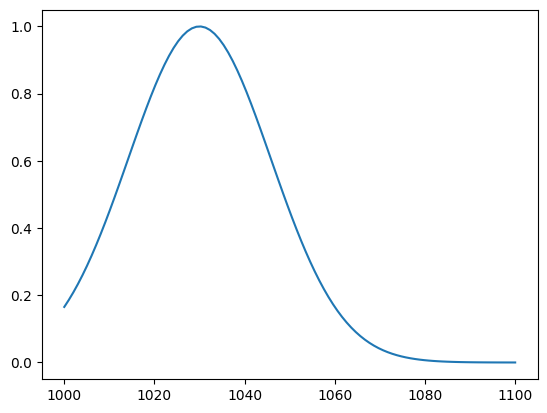

In [9]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0,100,100)
z = np.linspace(1000,1100,100)
t = np.exp(-0.002*(x-30)**2)

plt.plot(z,t)

In [7]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import scaleogram as scg 



In [14]:
import pywt
pywt.families()

['haar',
 'db',
 'sym',
 'coif',
 'bior',
 'rbio',
 'dmey',
 'gaus',
 'mexh',
 'morl',
 'cgau',
 'shan',
 'fbsp',
 'cmor']

In [15]:
pywt.wavelist(family='gaus', kind='all')

['gaus1', 'gaus2', 'gaus3', 'gaus4', 'gaus5', 'gaus6', 'gaus7', 'gaus8']

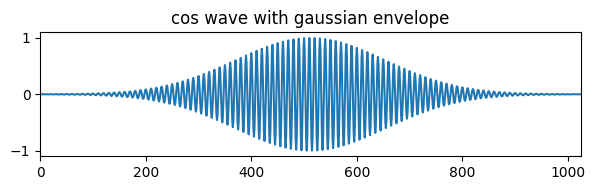

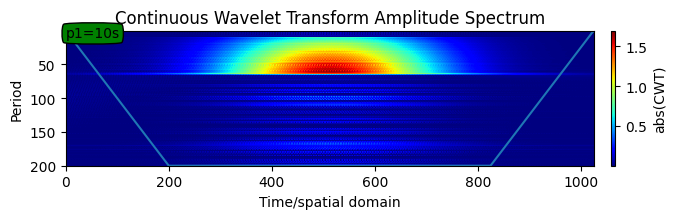

In [10]:
scg.set_default_wavelet('shan1.5-1.0')
#File ~/.local/lib/python3.10/site-packages/matplotlib/artist.py:989, in Artist._set_alpha_for_array(self, alpha)
#    979 """
#    980 Set the alpha value used for blending - not supported on all backends.
#    981 
#   (...)
#    986     Masked values and nans are not supported.
#    987 """
#    988 if isinstance(alpha, str):
#--> 989     raise TypeError("alpha must be numeric or None, not a string")
#    990 if not np.iterable(alpha):
#    991     Artist.set_alpha(self, alpha)


# let consider a timeline with 1 sample / second
ns   = 1024
time = np.arange(ns)

# and a range of scales to perform the transform
scales = scg.periods2scales( np.arange(1, 200) )

# and a periodic signal with varying amplitude
p1=10; periodic1 = np.cos(2*np.pi/p1*time) * np.exp(-((time-ns/2)/200)**2)

# plot the signal 
fig1, ax1 = plt.subplots(1, 1, figsize=(6.2,2));  
lines = ax1.plot(periodic1); 
ax1.set_xlim(0, len(time))
ax1.set_title("cos wave with gaussian envelope")
fig1.tight_layout()

# and the scaleogram
ax2 = scg.cws(periodic1, scales=scales, figsize=(6.9,2.3)); 
txt = ax2.annotate("p1=10s", xy=(0, 10), bbox=dict(boxstyle="round4", fc="g"))
plt.tight_layout()

In [36]:
nx = p.spy[0:3000]

In [37]:
len(nx)

3000

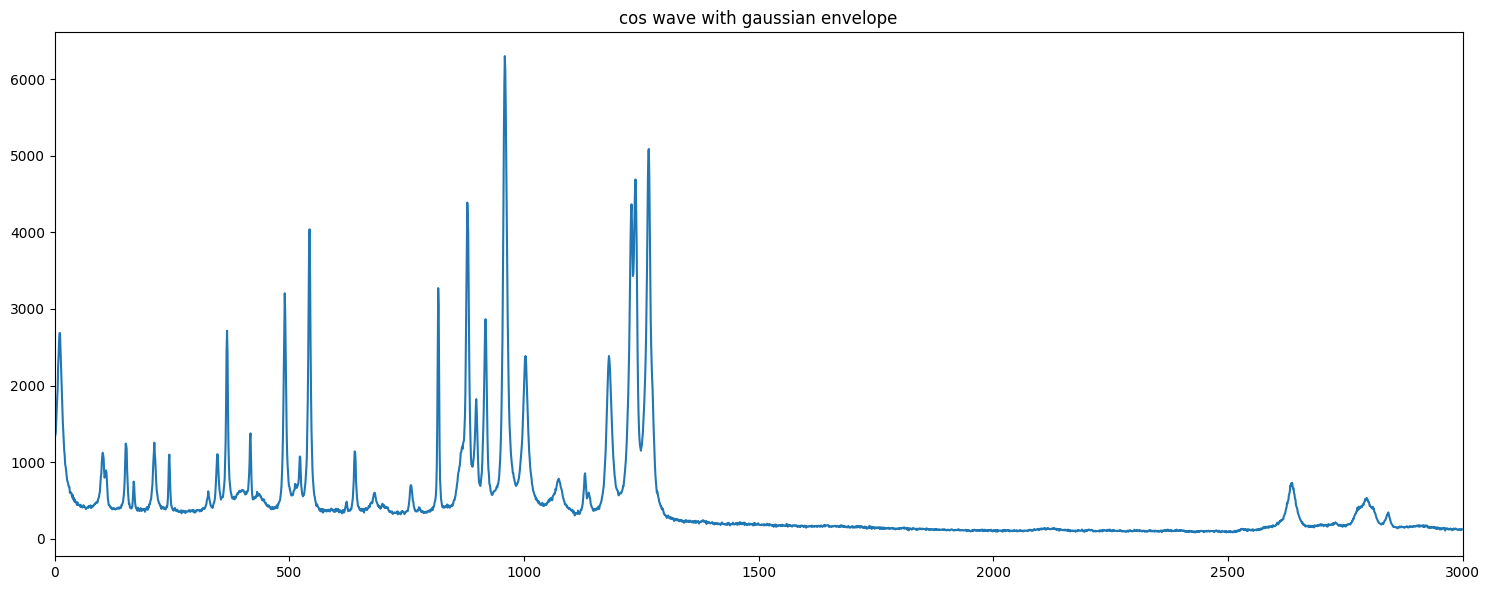

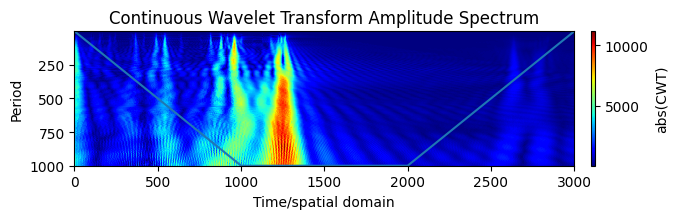

In [68]:
scg.set_default_wavelet('shan1.5-1.0')

ns   = len(nx)
time = np.arange(ns)

# and a range of scales to perform the transform
scales = scg.periods2scales( np.arange(1, 1000) )

# and a periodic signal with varying amplitude
p1=10; periodic1 = nx #np.cos(2*np.pi/p1*time) * np.exp(-((time-ns/2)/200)**2)

# plot the signal 
fig1, ax1 = plt.subplots(1, 1, figsize=(15,6));  
lines = ax1.plot(periodic1); 
ax1.set_xlim(0, len(time))
ax1.set_title("cos wave with gaussian envelope")
fig1.tight_layout()

# and the scaleogram
ax2 = scg.cws(periodic1, scales=scales, figsize=(6.9,2.3)); 
plt.tight_layout()

In [10]:
def ranfun(k):
    r = []
    for i in range(0,k):
        r.append(np.random.random())
    return np.array(r)/2


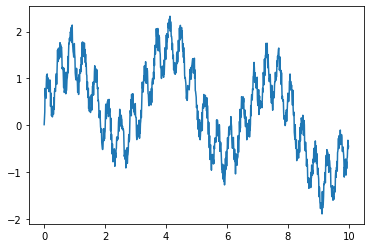

In [14]:
import numpy as np
import matplotlib.pyplot as plt
x  = np.arange(0,10,0.01)
y  = 0.5*np.sin((3.1416)*0.15*x)
y1 = np.sin((3.1416)*0.6*x)
y2 = 0.5*np.sin((3.1416)*5*x)
y3 = 5*np.sin((3.1416)*0.5*x)
#ss = np.sin(x*0.1)
#pp = np.sin(100*x)

noise  = ranfun(len(x))

#signal = noise+y+ss+pp
signal = y+y1+y2
signal = signal + noise
plt.plot(x, signal)


In [15]:
rango  = 200

scg.set_default_wavelet('gaus8')

times   = len(signal)
time = np.arange(times)

# and a range of scales to perform the transform
scales = scg.periods2scales( np.arange(1, rango) )

# and a periodic signal with varying amplitude
p1=10; periodic1 = signal #np.cos(2*np.pi/p1*time) * np.exp(-((time-ns/2)/200)**2)

# plot the signal 
fig1, ax1 = plt.subplots(1, 1, figsize=(15,6));  
lines = ax1.plot(periodic1); 
ax1.set_xlim(0, len(time))
ax1.set_title("or")
fig1.tight_layout()

# and the scaleogram
ax2 = scg.cws(periodic1, scales=scales, figsize=(6.9,2.3)); 
plt.tight_layout()

NameError: name 'scg' is not defined

In [1]:
!jt -l

Available Themes: 
   chesterish
   grade3
   gruvboxd
   gruvboxl
   monokai
   oceans16
   onedork
   solarizedd
   solarizedl


In [9]:
!jt -t gruvboxd